In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
dus14 = pd.read_csv('DUS2014.csv')
dus18 = pd.read_csv('DUS2018.csv')

In [5]:
d14s = dus14[['lytis', 'amzius', 'issilavinimas', 'bdu_spalio', 'profesija']]

In [6]:
d18s = dus18[['lytis', 'amzius', 'issilavinimas', 'bdu_spalio', 'profesija']]

In [15]:
# suraskite ir isspausdinkite vidutinius vyru bei moteru atlagynimus (spalio)
# 2014 ir 2018 metams
# 2014 vyru x, moteru y
# 2018 vyru x, moteru y

f14 = d14s[d14s['lytis'] == 'F']
m14 = d14s[d14s['lytis'] == 'M']
f18 = d18s[d18s['lytis'] == 'F']
m18 = d18s[d18s['lytis'] == 'M']

x14 = m14['bdu_spalio'].mean()
y14 = f14['bdu_spalio'].mean()
x18 = m18['bdu_spalio'].mean()
y18 = f18['bdu_spalio'].mean()

print('2014 vyru vidutinis atlyginimas:', x14/3.4528)
print('2014 moteru vidutinis atlyginimas:', y14/3.4528)
print('2018 vyru vidutinis atlyginimas:', x18)
print('2018 moteru vidutinis atlyginimas:', y18)

2014 vyru vidutinis atlyginimas: 762.7704309291468
2014 moteru vidutinis atlyginimas: 607.4431355450901
2018 vyru vidutinis atlyginimas: 1014.4962626801922
2018 moteru vidutinis atlyginimas: 832.1469450889405


In [14]:
import warnings
warnings.filterwarnings('ignore')

In [16]:
bdu_spalio = d14s['bdu_spalio'].values
bdu_eurais = bdu_spalio/3.4528
d14s['bdu_eurai'] = bdu_eurais
d14s.head(10)

,lytis,amzius,issilavinimas,bdu_spalio,profesija,bdu_eurai
0,M,20-29,G4,6.00,261,1.737720
1,F,20-29,G2,6.00,334,1.737720
2,F,40-49,G4,6.00,221,1.737720
3,F,30-39,G4,6.00,332,1.737720
4,M,40-49,G2,11.33,962,3.281395
5,M,30-39,G2,6.00,122,1.737720
6,M,60+,G4,6.00,221,1.737720
7,F,20-29,G2,13.33,531,3.860635
8,M,20-29,G1,6.67,912,1.931766
9,M,40-49,G2,6.00,332,1.737720


In [17]:
d14s['bdu_eurai'] =d14s['bdu_spalio']/3.4528 # trumpesnis budas nauja stulpeli ideti

In [18]:
# .query()
d14s.query('lytis == "M"')

,lytis,amzius,issilavinimas,bdu_spalio,profesija,bdu_eurai
0,M,20-29,G4,6.00,261,1.737720
4,M,40-49,G2,11.33,962,3.281395
5,M,30-39,G2,6.00,122,1.737720
6,M,60+,G4,6.00,221,1.737720
8,M,20-29,G1,6.67,912,1.931766
...,...,...,...,...,...,...
44925,M,40-49,G4,7849.67,134,2273.421571
44927,M,30-39,G4,1793.00,231,519.288693
44931,M,50-59,G4,3246.00,232,940.106580
44934,M,60+,G4,3819.67,231,1106.252896


In [23]:
d14s.query('lytis == "M" and issilavinimas == "G3"')

,lytis,amzius,issilavinimas,bdu_spalio,profesija,bdu_eurai
11,M,20-29,G3,9.67,315,2.800626
18,M,60+,G3,6.00,312,1.737720
19,M,20-29,G3,6.00,333,1.737720
21,M,20-29,G3,28.67,241,8.303406
25,M,50-59,G3,6.00,261,1.737720
...,...,...,...,...,...,...
44805,M,40-49,G3,3685.00,233,1067.249768
44808,M,60+,G3,2692.00,235,779.657090
44843,M,20-29,G3,1625.00,235,470.632530
44914,M,40-49,G3,3444.33,234,997.546918


In [26]:
edu = input('iveskite issilavinimo koda (G1,G2,G3,G4):')
ats = d14s.query('issilavinimas == @edu') # @ !!!!!
ats.head(3)

,lytis,amzius,issilavinimas,bdu_spalio,profesija,bdu_eurai
8,M,20-29,G1,6.67,912,1.931766
51,M,20-29,G1,160.33,962,46.434778
68,F,30-39,G1,1041.00,524,301.494439


In [43]:
# parašykite for ciklą, kuris išspausdintų išsilavinimo kodą ir vidutinį atlyginimą
# respondentų su tuo išsilavinimo kodu.
# naudokite .query() metodą
edus = ['G1', 'G2', 'G3', 'G4']
g1_issilavinimas = d14s.query('issilavinimas == "G1"')
for kodas in edus:
  vidurki = d14s.query('issilavinimas == @kodas')['bdu_eurai'].mean()
  print(kodas, vidurki)

G1 474.7446499958954
G2 543.8925813045148
G3 730.4106784275447
G4 1011.9653972982893


In [46]:
def ltltoEuro(litas):
  euras = litas/3.45280
  return euras

d14s['Eurai is funkcijos'] = d14s['bdu_spalio'].apply(ltltoEuro)

In [47]:
d14s.head(6)

,lytis,amzius,issilavinimas,bdu_spalio,profesija,bdu_eurai,Eurai is funkcijos
0,M,20-29,G4,6.00,261,1.737720,1.737720
1,F,20-29,G2,6.00,334,1.737720,1.737720
2,F,40-49,G4,6.00,221,1.737720,1.737720
3,F,30-39,G4,6.00,332,1.737720,1.737720
4,M,40-49,G2,11.33,962,3.281395,3.281395
5,M,30-39,G2,6.00,122,1.737720,1.737720


In [49]:
# parašykite kodą, kuris pridėtų naują stulpelį prie d14s lentelės
#  kur būtų tokie žodžiai:
# Vyras, jei stulpelyje lytis buvo M raidė
# Moteris, jei stulpelyje lytis buvo F raidė

def LTlytis(lytis):
  if lytis == 'M':
    return 'Vyras'
  else:
    return 'Moteris'
d14s["Lytis Lietuviskai"] = d14s["lytis"].apply(LTlytis)  
d14s.head(6)

,lytis,amzius,issilavinimas,bdu_spalio,profesija,bdu_eurai,Eurai is funkcijos,Lytis Lietuviskai
0,M,20-29,G4,6.00,261,1.737720,1.737720,Vyras
1,F,20-29,G2,6.00,334,1.737720,1.737720,Moteris
2,F,40-49,G4,6.00,221,1.737720,1.737720,Moteris
3,F,30-39,G4,6.00,332,1.737720,1.737720,Moteris
4,M,40-49,G2,11.33,962,3.281395,3.281395,Vyras
5,M,30-39,G2,6.00,122,1.737720,1.737720,Vyras


In [50]:
def zodzioKeitimas():
    lytys = []
    for x in dus14['lytis'].values:
        if x == 'M':
            lytys.append('Vyras')
        else:
            lytys.append('Moteris')
    return lytys
zodzioKeitimas()
d14s['Vyrai ir Moterys'] = zodzioKeitimas()
d14s.head(15)

,lytis,amzius,issilavinimas,bdu_spalio,profesija,bdu_eurai,Eurai is funkcijos,Lytis Lietuviskai,Vyrai ir Moterys
0,M,20-29,G4,6.00,261,1.737720,1.737720,Vyras,Vyras
1,F,20-29,G2,6.00,334,1.737720,1.737720,Moteris,Moteris
2,F,40-49,G4,6.00,221,1.737720,1.737720,Moteris,Moteris
3,F,30-39,G4,6.00,332,1.737720,1.737720,Moteris,Moteris
4,M,40-49,G2,11.33,962,3.281395,3.281395,Vyras,Vyras
5,M,30-39,G2,6.00,122,1.737720,1.737720,Vyras,Vyras
6,M,60+,G4,6.00,221,1.737720,1.737720,Vyras,Vyras
7,F,20-29,G2,13.33,531,3.860635,3.860635,Moteris,Moteris
8,M,20-29,G1,6.67,912,1.931766,1.931766,Vyras,Vyras
9,M,40-49,G2,6.00,332,1.737720,1.737720,Vyras,Vyras


In [58]:
nypd = pd.read_csv('NYPD_Shooting.csv', sep= ';', encoding='utf-8', parse_dates=['OCCUR_DATE', 'OCCUR_TIME'])
nypd.head()

,INCIDENT_KEY,OCCUR_DATE,OCCUR_TIME,BORO,PRECINCT,JURISDICTION_CODE,LOCATION_DESC,STATISTICAL_MURDER_FLAG,PERP_AGE_GROUP,PERP_SEX,PERP_RACE,VIC_AGE_GROUP,VIC_SEX,VIC_RACE,Latitude,Longitude
0,201575314,2019-08-23,2024-04-11 22:10:00,QUEENS,103,0.0,NaN,False,NaN,NaN,NaN,25-44,M,BLACK,40.697805,-73.808141
1,205748546,2019-11-27,2024-04-11 15:54:00,BRONX,40,0.0,NaN,False,<18,M,BLACK,25-44,F,BLACK,40.818700,-73.918571
2,193118596,2019-02-02,2024-04-11 19:40:00,MANHATTAN,23,0.0,NaN,False,18-24,M,WHITE HISPANIC,18-24,M,BLACK HISPANIC,40.791916,-73.945480
3,204192600,2019-10-24,2024-04-11 00:52:00,STATEN ISLAND,121,0.0,PVT HOUSE,True,25-44,M,BLACK,25-44,F,BLACK,40.638064,-74.166108
4,201483468,2019-08-22,2024-04-11 18:03:00,BRONX,46,0.0,NaN,False,25-44,M,BLACK HISPANIC,18-24,M,BLACK,40.854547,-73.913339


In [61]:
nypd = pd.read_csv('NYPD_Shooting.csv', sep= ';',parse_dates = {'DATA':['OCCUR_DATE', 'OCCUR_TIME']})
nypd.head()

,DATA,INCIDENT_KEY,BORO,PRECINCT,JURISDICTION_CODE,LOCATION_DESC,STATISTICAL_MURDER_FLAG,PERP_AGE_GROUP,PERP_SEX,PERP_RACE,VIC_AGE_GROUP,VIC_SEX,VIC_RACE,Latitude,Longitude
0,2019-08-23 22:10:00,201575314,QUEENS,103,0.0,NaN,False,NaN,NaN,NaN,25-44,M,BLACK,40.697805,-73.808141
1,2019-11-27 15:54:00,205748546,BRONX,40,0.0,NaN,False,<18,M,BLACK,25-44,F,BLACK,40.818700,-73.918571
2,2019-02-02 19:40:00,193118596,MANHATTAN,23,0.0,NaN,False,18-24,M,WHITE HISPANIC,18-24,M,BLACK HISPANIC,40.791916,-73.945480
3,2019-10-24 00:52:00,204192600,STATEN ISLAND,121,0.0,PVT HOUSE,True,25-44,M,BLACK,25-44,F,BLACK,40.638064,-74.166108
4,2019-08-22 18:03:00,201483468,BRONX,46,0.0,NaN,False,25-44,M,BLACK HISPANIC,18-24,M,BLACK,40.854547,-73.913339


In [78]:
# .dt modulis, veikia tik tada,jei
# sulpelis DataFrame yra datetime tipo
nypd_small = nypd[['DATA','BORO','STATISTICAL_MURDER_FLAG']]
nypd_small.head()

,DATA,BORO,STATISTICAL_MURDER_FLAG
0,2019-08-23 22:10:00,QUEENS,False
1,2019-11-27 15:54:00,BRONX,False
2,2019-02-02 19:40:00,MANHATTAN,False
3,2019-10-24 00:52:00,STATEN ISLAND,True
4,2019-08-22 18:03:00,BRONX,False


In [80]:
nypd_small['MonthNr'] = nypd_small['DATA'].dt.month
nypd_small['Hour'] = nypd_small['DATA'].dt.hour
nypd_small['HR'] = nypd_small['DATA'].dt.round('H').dt.hour
nypd_small['MthName'] = nypd_small['DATA'].dt.month_name()
nypd_small.head()

,DATA,BORO,STATISTICAL_MURDER_FLAG,MonthNr,Hour,HR,MthName
0,2019-08-23 22:10:00,QUEENS,False,8,22,22,August
1,2019-11-27 15:54:00,BRONX,False,11,15,16,November
2,2019-02-02 19:40:00,MANHATTAN,False,2,19,20,February
3,2019-10-24 00:52:00,STATEN ISLAND,True,10,0,1,October
4,2019-08-22 18:03:00,BRONX,False,8,18,18,August


In [81]:
# sukurkite du naujus stulpelius
# viename turi būti paros laikas ('Rytas, Vakaras, etc)
# kitame metų laikas (žiema, vasara, etc)
# naudokite stulpelius Hour ir MonthNr

def para(x):
    if x >= 22 or x < 6:
        return 'Naktis'
    elif x >= 6 and x < 10:
        return 'Rytas'
    elif x >= 10 and x < 16:
        return 'Diena'
    else:
        return 'Vakaras'

def metai(x):
    if x in [12,1,2]:
        return 'Žiema'
    elif x in [3,4,5]:
        return 'Pavasaris'
    elif x in [6,7,8]:
        return 'Vasara'
    else:
        return 'Ruduo'

nypd_small['ParosL'] = nypd_small['Hour'].apply(para)
nypd_small['MetųL'] = nypd_small['MonthNr'].apply(metai)
nypd_small.head()

,DATA,BORO,STATISTICAL_MURDER_FLAG,MonthNr,Hour,HR,MthName,ParosL,MetųL
0,2019-08-23 22:10:00,QUEENS,False,8,22,22,August,Naktis,Vasara
1,2019-11-27 15:54:00,BRONX,False,11,15,16,November,Diena,Ruduo
2,2019-02-02 19:40:00,MANHATTAN,False,2,19,20,February,Vakaras,Žiema
3,2019-10-24 00:52:00,STATEN ISLAND,True,10,0,1,October,Naktis,Ruduo
4,2019-08-22 18:03:00,BRONX,False,8,18,18,August,Vakaras,Vasara


In [95]:
shootings = nypd_small['MthName'].value_counts()
months = shootings.index
counts = shootings.values
print(months, counts, sep= '\n')

Index(['July', 'August', 'June', 'May', 'September', 'October', 'December',
       'April', 'November', 'January', 'March', 'February'],
      dtype='object', name='MthName')
[2482 2462 2192 2037 2033 1851 1601 1578 1550 1411 1331 1098]


In [96]:
nypd_small['MonthNr'].value_counts().sort_index(ascending=True)

MonthNr
1     1411
2     1098
3     1331
4     1578
5     2037
6     2192
7     2482
8     2462
9     2033
10    1851
11    1550
12    1601
Name: count, dtype: int64

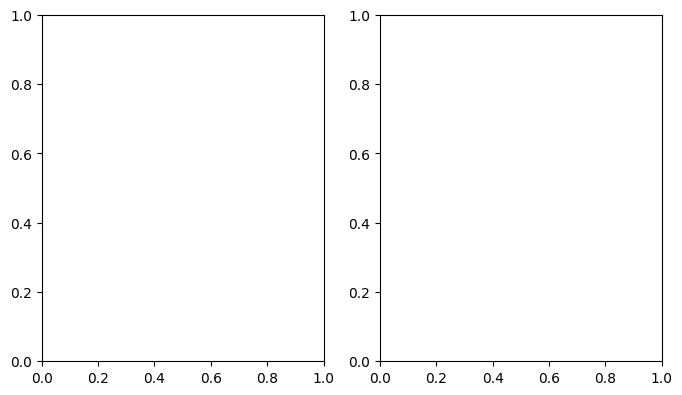

In [111]:
# plt.subplots():
langas, grafikas = plt.subplots(1,2, figsize=[8,4.5]) #16:9


plt.show()

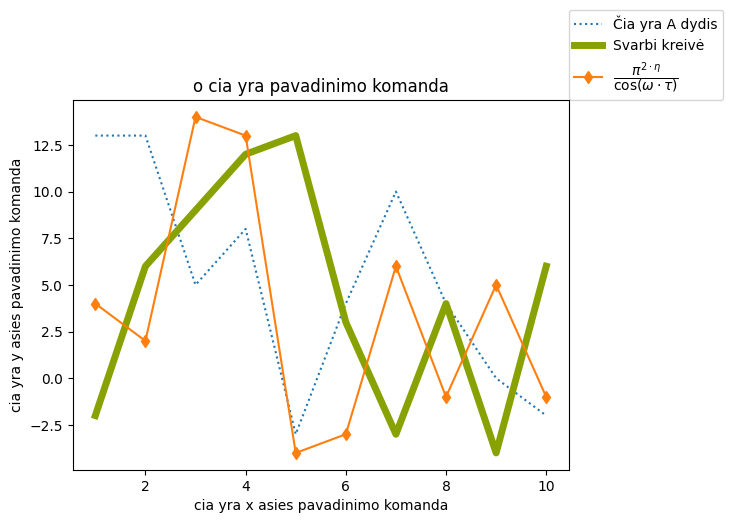

In [245]:
# plt.subplots():
a = np.arange(1,11)
b = np.random.randint(-5, 15, 10)
c = np.random.randint(-5, 15, 10)
d = np.random.randint(-5, 15, 10)
langas, grafikas = plt.subplots()
# .plot() metodas:
grafikas.plot(a,b, label="Čia yra A dydis", linestyle=':')
grafikas.plot(a,c, label="Svarbi kreivė", linewidth=5, color='xkcd:vomit green')
grafikas.plot(a,d, label=r'$\dfrac{\pi^{2\cdot \eta}}{\cos(\omega\cdot\tau)}$', marker='d')

grafikas.set_xlabel('cia yra x asies pavadinimo komanda')
grafikas.set_ylabel('cia yra y asies pavadinimo komanda')
grafikas.set_title('o cia yra pavadinimo komanda')
grafikas.legend(loc=[1,1]) #'best', 'upper right', 'upper left', 'lower left', 'lower right', 'right', 'center left', 'center right', 'lower center', 'upper center', 'center

plt.show()

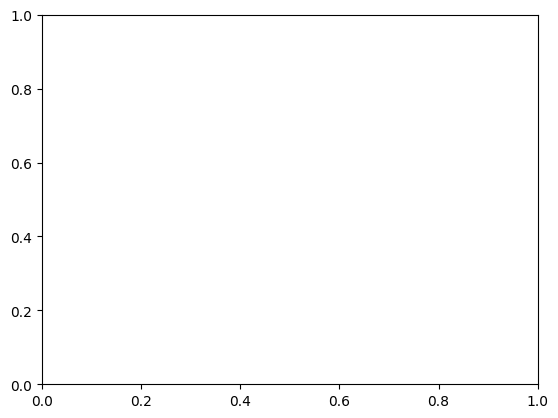

In [247]:
# turite nypd susišaudymų duomenis.
# nubraižykite vizualizaciją, naudodami ką tik pateiktą pavyzdį, 
# kad matytumėme, kurį monėsį yra daugiausiai, mažiausiai užfiksduotų
# susišaudymų
# sudėkite prasmingus ašių pavadinimus

months, counts = plt.subplots()





plt.show()